In [1]:
import os
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

if os.getcwd().endswith('notebook'):
    os.chdir('..')

In [2]:
sns.set(palette='colorblind', font_scale=1.3)

In [3]:
run_id = 'run_pv1ea'
trace_path = os.path.join(os.getcwd(), f'hyperparameters/{run_id}/trace.json')

In [4]:
with open(trace_path) as f:
    trace = json.load(f)['trace']

In [5]:
trace[0].keys()

dict_keys(['x', 'expected_improvement', 'train_loss', 'test_loss', 'elapsed', 'timestamp'])

In [6]:
trace[0]['x'].keys()

dict_keys(['n_epochs', 'n_conv_1', 'n_filters_1', 'kernel_size_1', 'n_conv_2', 'n_filters_2', 'kernel_size_2'])

In [7]:
def plot_trace_parameter(trace, parameter):
    f, ax = plt.subplots(1, 1, figsize=(12, 6))
    
    parameters = [parameter]
    if isinstance(parameter, list):
        parameters = parameter
    
    for p in parameters:
        y = [t[p] for t in trace]
        x = range(1, len(y) + 1)
        ax.plot(x, y, 'o', label=p.replace('_', ' ').title())
    
    ax.set_xlabel('Iteration')
    ax.legend()

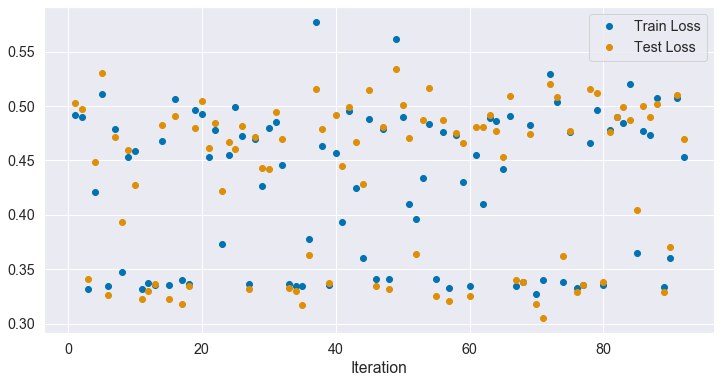

In [8]:
plot_trace_parameter(trace, ['train_loss', 'test_loss'])

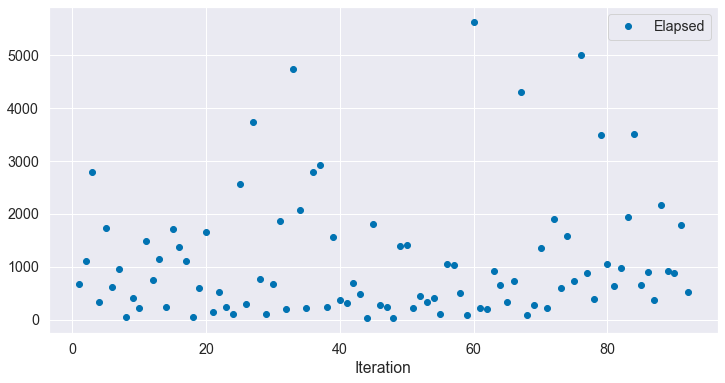

In [9]:
plot_trace_parameter(trace, 'elapsed')

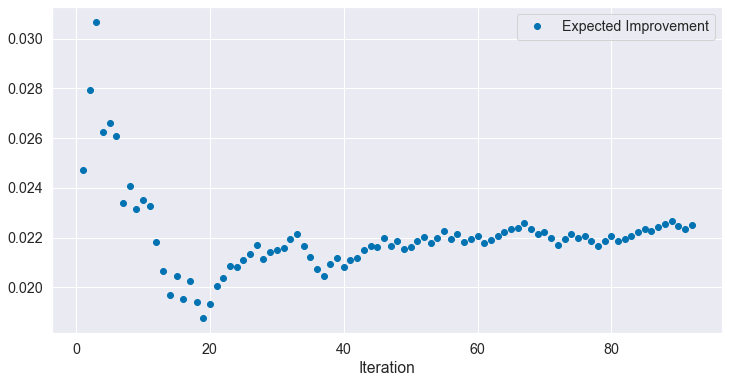

In [10]:
plot_trace_parameter(trace, 'expected_improvement')

In [11]:
mean_elapsed_s = np.mean([t['elapsed'] for t in trace])
mean_elapsed_min = mean_elapsed_s / 60
print(f'Average loop time: ~{mean_elapsed_min:.0f} minutes ({mean_elapsed_s:.0f} seconds)', )

Average loop time: ~18 minutes (1108 seconds)


In [12]:
median_elapsed_s = np.median([t['elapsed'] for t in trace])
median_elapsed_min = median_elapsed_s / 60
print(f'Average loop time: ~{median_elapsed_min:.0f} minutes ({median_elapsed_s:.0f} seconds)', )

Average loop time: ~11 minutes (685 seconds)


In [13]:
x = [{k: v for k, v in t['x'].items()} for t in trace]

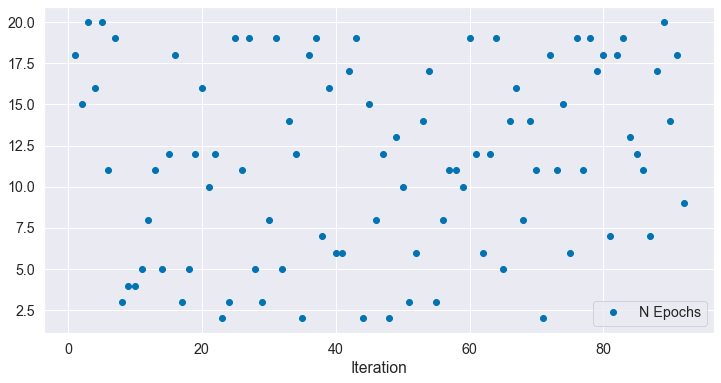

In [14]:
plot_trace_parameter(x, 'n_epochs')

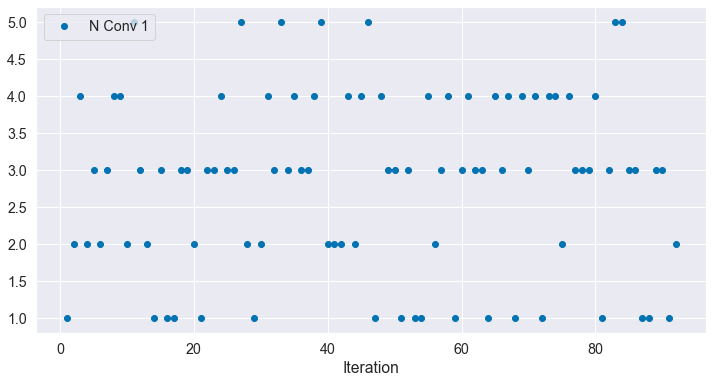

In [15]:
plot_trace_parameter(x, 'n_conv_1')

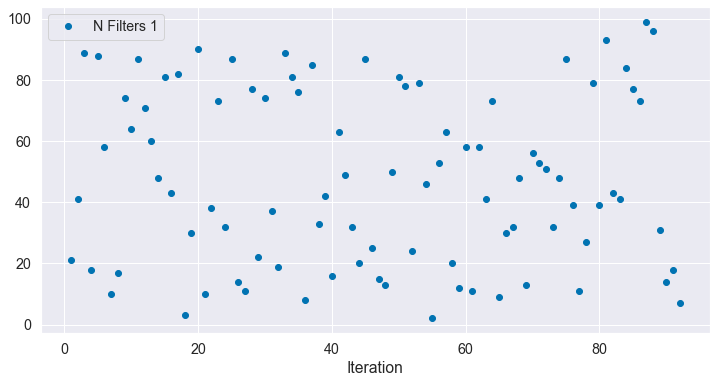

In [16]:
plot_trace_parameter(x, 'n_filters_1')

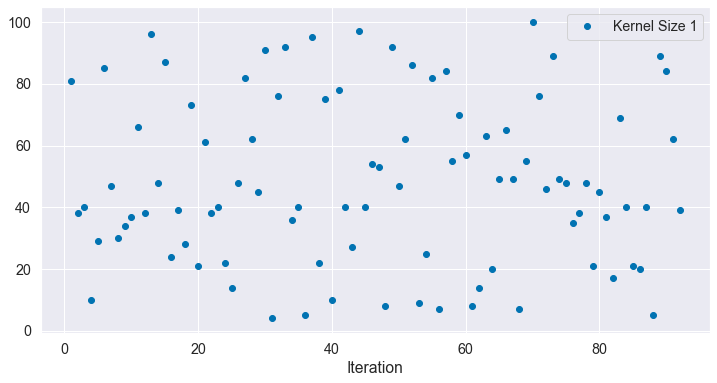

In [17]:
plot_trace_parameter(x, 'kernel_size_1')

In [18]:
sorted(trace, key=lambda t: -t['test_loss'])[:5]

[{'x': {'n_epochs': 13,
   'n_conv_1': 3,
   'n_filters_1': 50,
   'kernel_size_1': 92,
   'n_conv_2': 2,
   'n_filters_2': 85,
   'kernel_size_2': 36},
  'expected_improvement': 0.02153143597380608,
  'train_loss': 0.5620567202568054,
  'test_loss': 0.5337837934494019,
  'elapsed': 1392.630155324936,
  'timestamp': 1578795820.1185617},
 {'x': {'n_epochs': 20,
   'n_conv_1': 3,
   'n_filters_1': 88,
   'kernel_size_1': 29,
   'n_conv_2': 1,
   'n_filters_2': 54,
   'kernel_size_2': 44},
  'expected_improvement': 0.026592926961547317,
  'train_loss': 0.5108916163444519,
  'test_loss': 0.5307432413101196,
  'elapsed': 1727.2782099246979,
  'timestamp': 1578751065.7182162},
 {'x': {'n_epochs': 18,
   'n_conv_1': 1,
   'n_filters_1': 51,
   'kernel_size_1': 46,
   'n_conv_2': 4,
   'n_filters_2': 74,
   'kernel_size_2': 36},
  'expected_improvement': 0.021697564514507738,
  'train_loss': 0.5296352505683899,
  'test_loss': 0.520608127117157,
  'elapsed': 1902.857364654541,
  'timestamp': 15